In [90]:
import pandas as pd
rankeds = pd.read_csv('high_diamond_ranked_10min.csv')

In [91]:
toDrop = []

for team in ['blue', 'red']:
    for case in ['WardsDestroyed', 'GoldDiff', 'ExperienceDiff', 'CSPerMin', 'GoldPerMin', 'AvgLevel', 'TotalExperience', 'EliteMonsters', 'TotalJungleMinionsKilled', 'FirstBlood', 'Heralds', 'TowersDestroyed', 'Dragons']:
        toDrop.append(team + case)
        
rankeds.drop(['gameId'] + toDrop,  axis=1, inplace=True)

for column in rankeds.columns:
    if 'red' in column:
        rankeds.drop(column,  axis=1, inplace=True)


In [92]:
rankeds.columns

Index(['blueWins', 'blueWardsPlaced', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueTotalGold', 'blueTotalMinionsKilled'],
      dtype='object')

In [93]:
# rankeds['redWins'] = rankeds.apply(lambda row: row.blueWins == 0, axis=1)
# rankeds['blueWins'] = rankeds.apply(lambda row: row.blueWins == 1, axis=1)

In [94]:
rankeds.head(10)

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,0,28,9,6,11,17210,195
1,0,12,5,5,5,14712,174
2,0,15,7,11,4,16113,186
3,0,43,4,5,5,15157,201
4,0,75,6,6,6,16400,210
5,1,18,5,3,6,15899,225
6,1,18,7,6,7,16874,225
7,0,16,5,13,3,15305,209
8,0,16,7,7,8,16401,189
9,1,13,4,5,5,15057,220


In [95]:
rankeds.describe()

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,6.183925,6.137666,6.645106,16503.455512,216.699565
std,0.500024,18.019177,3.011028,2.933818,4.064520,1535.446636,21.858437
min,0.000000,5.000000,0.000000,0.000000,0.000000,10730.000000,90.000000
25%,0.000000,14.000000,4.000000,4.000000,4.000000,15415.500000,202.000000
50%,0.000000,16.000000,6.000000,6.000000,6.000000,16398.000000,218.000000
75%,1.000000,20.000000,8.000000,8.000000,9.000000,17459.000000,232.000000
max,1.000000,250.000000,22.000000,22.000000,29.000000,23701.000000,283.000000


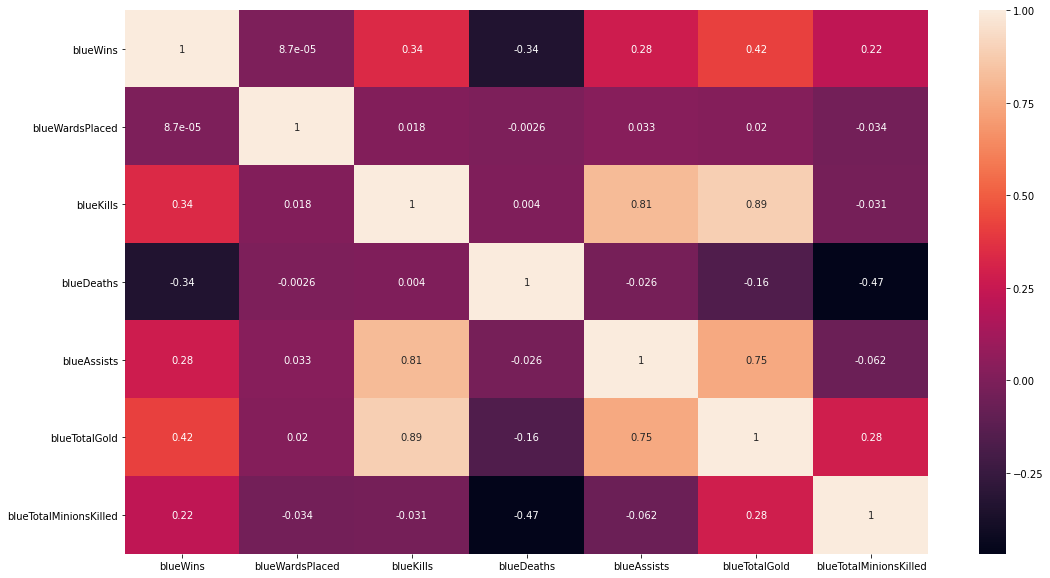

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))

corr = rankeds.corr()
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values, annot=True )


Text(0.5, 1.0, 'Zależność długości od szerokości kielicha')

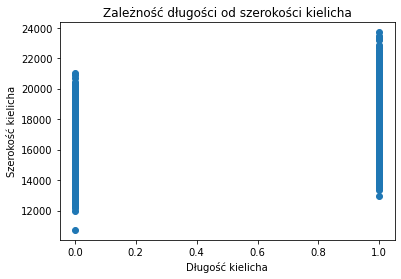

In [97]:
plt.scatter(rankeds['blueWins'], rankeds['blueTotalGold'])
plt.xlabel('Długość kielicha')
plt.ylabel('Szerokość kielicha')
plt.title('Zależność długości od szerokości kielicha')

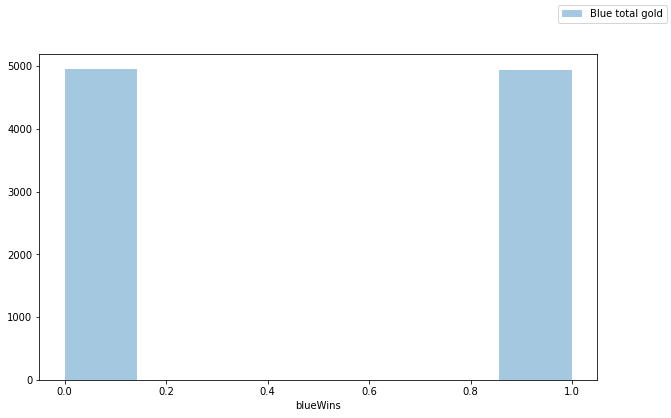

In [98]:
fig = plt.figure(figsize=(10,6))
sns.distplot(rankeds['blueWins'], label='Blue total gold', bins=7,  kde=False)
fig.legend(labels=['Blue total gold'])

plt.show()

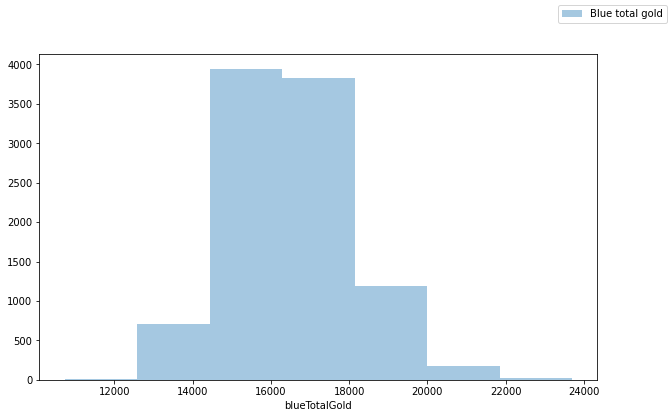

In [99]:

fig = plt.figure(figsize=(10,6))
sns.distplot(rankeds['blueTotalGold'], label='Blue total gold', bins=7,  kde=False)
fig.legend(labels=['Blue total gold'])

plt.show()


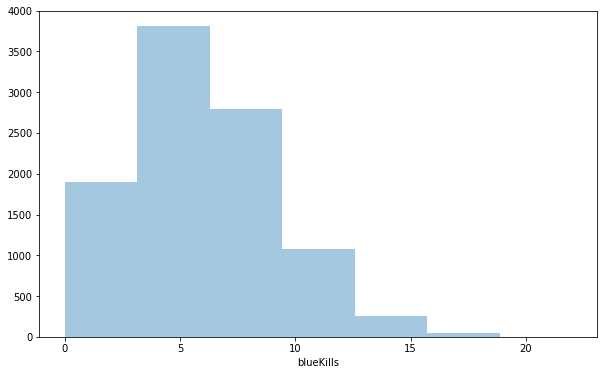

In [100]:
fig = plt.figure(figsize=(10,6))
sns.distplot(rankeds['blueKills'], label='Blue kills', bins=7,  kde=False)

plt.show()

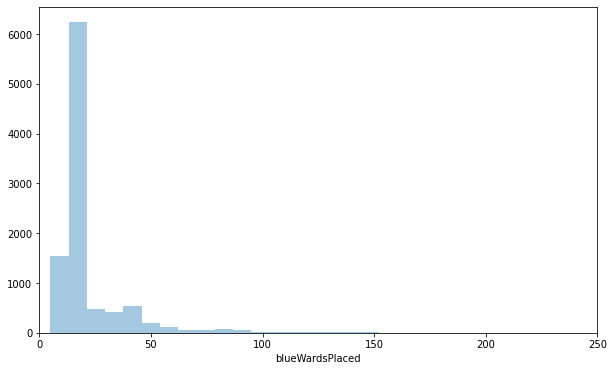

In [101]:
fig = plt.figure(figsize=(10,6))
plt.xlim(0, rankeds['blueWardsPlaced'].max())
sns.distplot(rankeds['blueWardsPlaced'], label='Blue kills', bins=30,  kde=False)

plt.show()

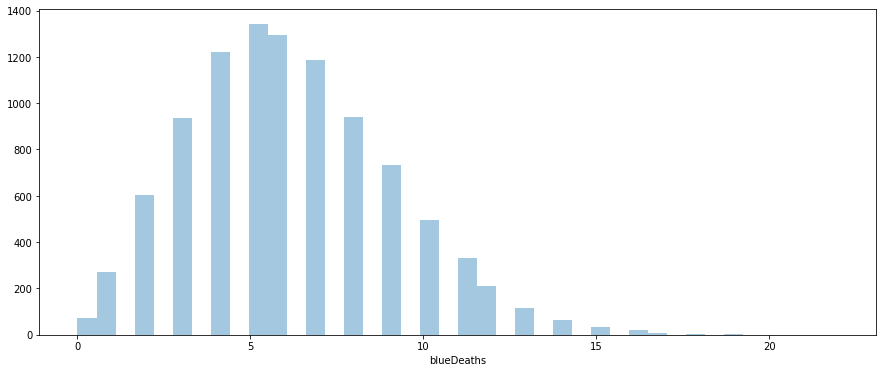

In [102]:

fig = plt.figure(figsize=(15,6))
sns.distplot(rankeds['blueDeaths'], label='Blue deaths', bins=40,  kde=False)

plt.show()

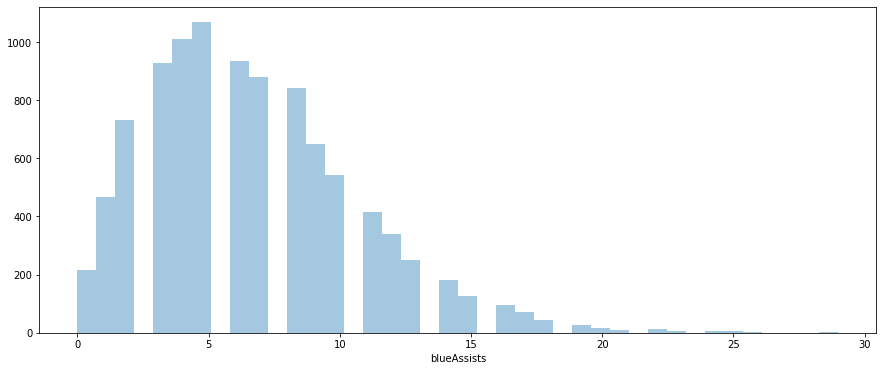

In [103]:

fig = plt.figure(figsize=(15,6))
sns.distplot(rankeds['blueAssists'], label='Blue assissts', bins=40,  kde=False)

plt.show()

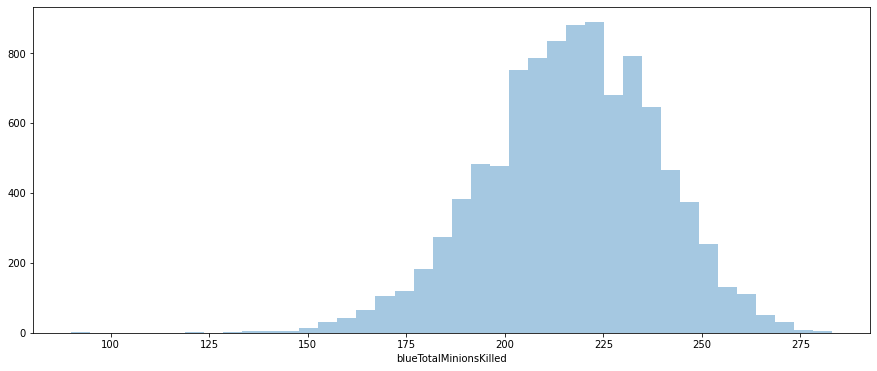

In [104]:

fig = plt.figure(figsize=(15,6))
sns.distplot(rankeds['blueTotalMinionsKilled'], label='Blue assissts', bins=40,  kde=False)

plt.show()

### Odległość euklidesowa


In [105]:
# funkcja pomocnicza
def euclidean_distance(row1, row2):
    return np.linalg.norm(row1 - row2)

In [106]:
euclidean_distance(rankeds.blueTotalGold.loc[0], rankeds.blueTotalGold.loc[1])

2498.0

### Standaryzacja danych za pomocą StandardScaler

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rankeds_standarized = pd.DataFrame(scaler.fit_transform(rankeds), columns = rankeds.columns)
rankeds_standarized.head()

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,-0.998079,0.316996,0.935301,-0.046926,1.071495,0.460179,-0.992782
1,-0.998079,-0.570992,-0.393216,-0.387796,-0.404768,-1.166792,-1.953558
2,-0.998079,-0.404494,0.271042,1.657424,-0.650812,-0.254307,-1.404543
3,-0.998079,1.149484,-0.725346,-0.387796,-0.404768,-0.876959,-0.718275
4,-0.998079,2.925460,-0.061087,-0.046926,-0.158724,-0.067382,-0.306513


In [108]:
scaler.mean_

array([4.99038364e-01, 2.22882883e+01, 6.18392550e+00, 6.13766576e+00,
       6.64510578e+00, 1.65034555e+04, 2.16699565e+02])

In [109]:
scaler.scale_

array([4.99999075e-01, 1.80182645e+01, 3.01087558e+00, 2.93366922e+00,
       4.06431418e+00, 1.53536892e+03, 2.18573310e+01])

In [110]:
#po standaryzacji
euclidean_distance(rankeds_standarized.blueTotalGold.loc[0], rankeds_standarized.blueTotalGold.loc[1])

1.6269705376383046

### Klastrowanie metodą k-średnich = 2

In [111]:
from sklearn.cluster import KMeans

In [112]:
k2 = KMeans(n_clusters=2)
k2.fit(rankeds_standarized)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

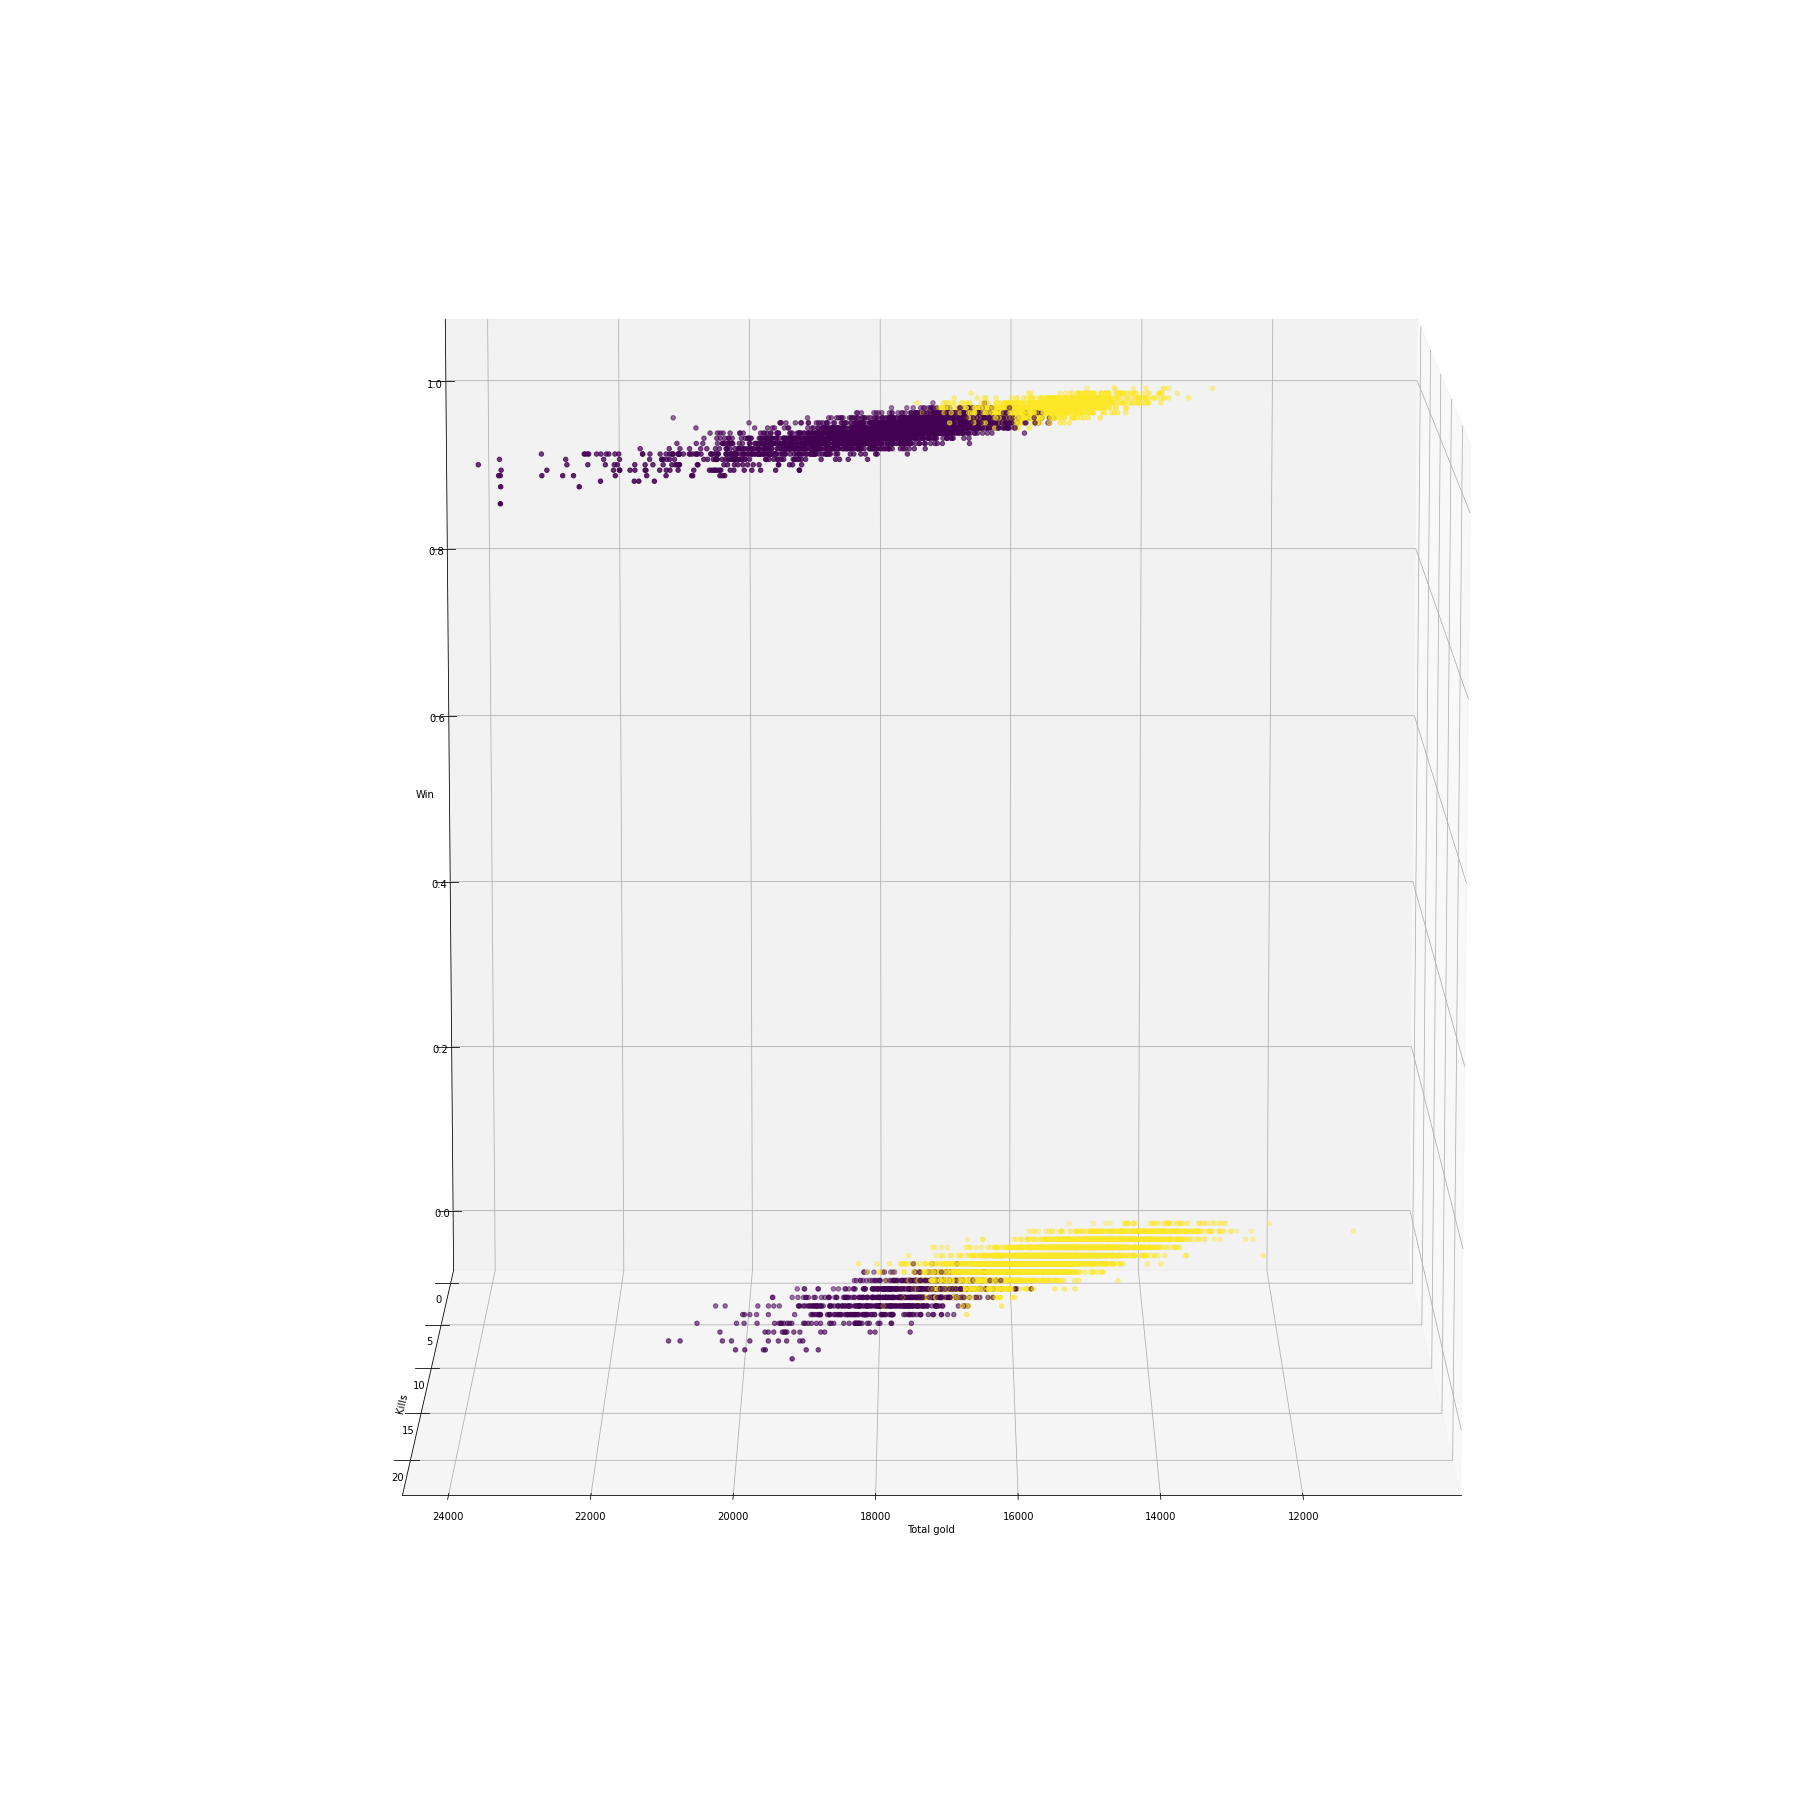

In [113]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,25))
ax = Axes3D(fig)
ax.scatter(rankeds['blueTotalGold'], rankeds['blueKills'], rankeds['blueWins'], c=k2.labels_)
ax.set_xlabel('Total gold')
ax.set_ylabel('Kills')
ax.set_zlabel('Win')
ax.view_init(10, 90)
plt.show()

### Analiza modeli k-means dla zakresu (2,15)


In [114]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

k_clusters = []
inertia = []
silhouette = []
calinski = []

for k in range(2,15):
    km = KMeans(n_clusters = k)
    km.fit(rankeds_standarized)
    
    k_clusters.append(k)
    silhouette.append(silhouette_score(rankeds_standarized, km.labels_))
    calinski.append(calinski_harabasz_score(rankeds_standarized, km.labels_))
    inertia.append(km.inertia_)
    


Text(0, 0.5, 'Silhouette coefficient')

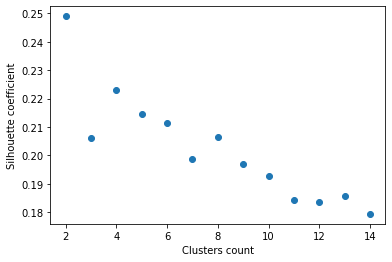

In [115]:
plt.scatter(k_clusters, silhouette)
plt.xlabel('Clusters count')
plt.ylabel('Silhouette coefficient')


Text(0, 0.5, 'Calinski-Harabasz score')

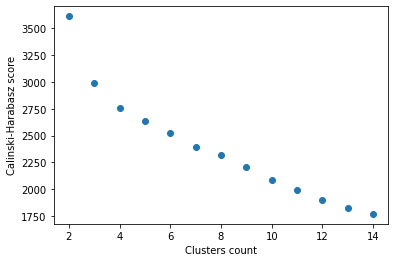

In [116]:
plt.scatter(k_clusters, calinski)
plt.xlabel('Clusters count')
plt.ylabel('Calinski-Harabasz score')

Text(0, 0.5, 'Inertia')

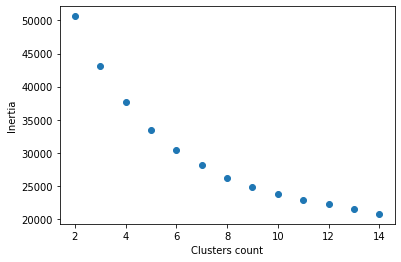

In [117]:
plt.scatter(k_clusters, inertia)
plt.xlabel('Clusters count')
plt.ylabel('Inertia')

In [118]:
km = KMeans(n_clusters=4)
km.fit(rankeds_standarized)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [119]:
pd.DataFrame(scaler.inverse_transform(km.cluster_centers_), columns=rankeds_standarized.columns)

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,0.775277,19.509033,5.061807,4.171157,5.102060,16311.066561,230.614897
1,0.070388,19.175694,4.459170,7.921914,4.510311,15374.563926,205.149574
2,0.455526,94.342318,6.334232,6.450135,6.719677,16599.846361,213.428571
3,0.758100,19.842415,9.776510,5.990059,11.286082,18225.474963,216.448454


In [120]:
km = KMeans(n_clusters=6)
km.fit(rankeds_standarized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [122]:
pd.DataFrame(scaler.inverse_transform(km.cluster_centers_), columns=rankeds_standarized.columns)

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,4.692082e-01,97.360704,6.296188,6.375367,6.656891,16603.938416,214.258065
1,8.238994e-02,18.689937,3.698742,9.094340,3.486164,14782.108805,195.162893
2,9.368984e-01,19.894118,10.206952,5.105882,11.789305,18587.087166,222.452406
3,1.906566e-01,19.861742,7.989268,8.339015,9.047980,17015.969697,202.818182
4,-1.804112e-14,19.748036,4.083814,5.086433,4.187009,15711.716606,227.784180
5,1.000000e+00,19.693230,5.232108,4.461509,5.208124,16312.311412,226.427079


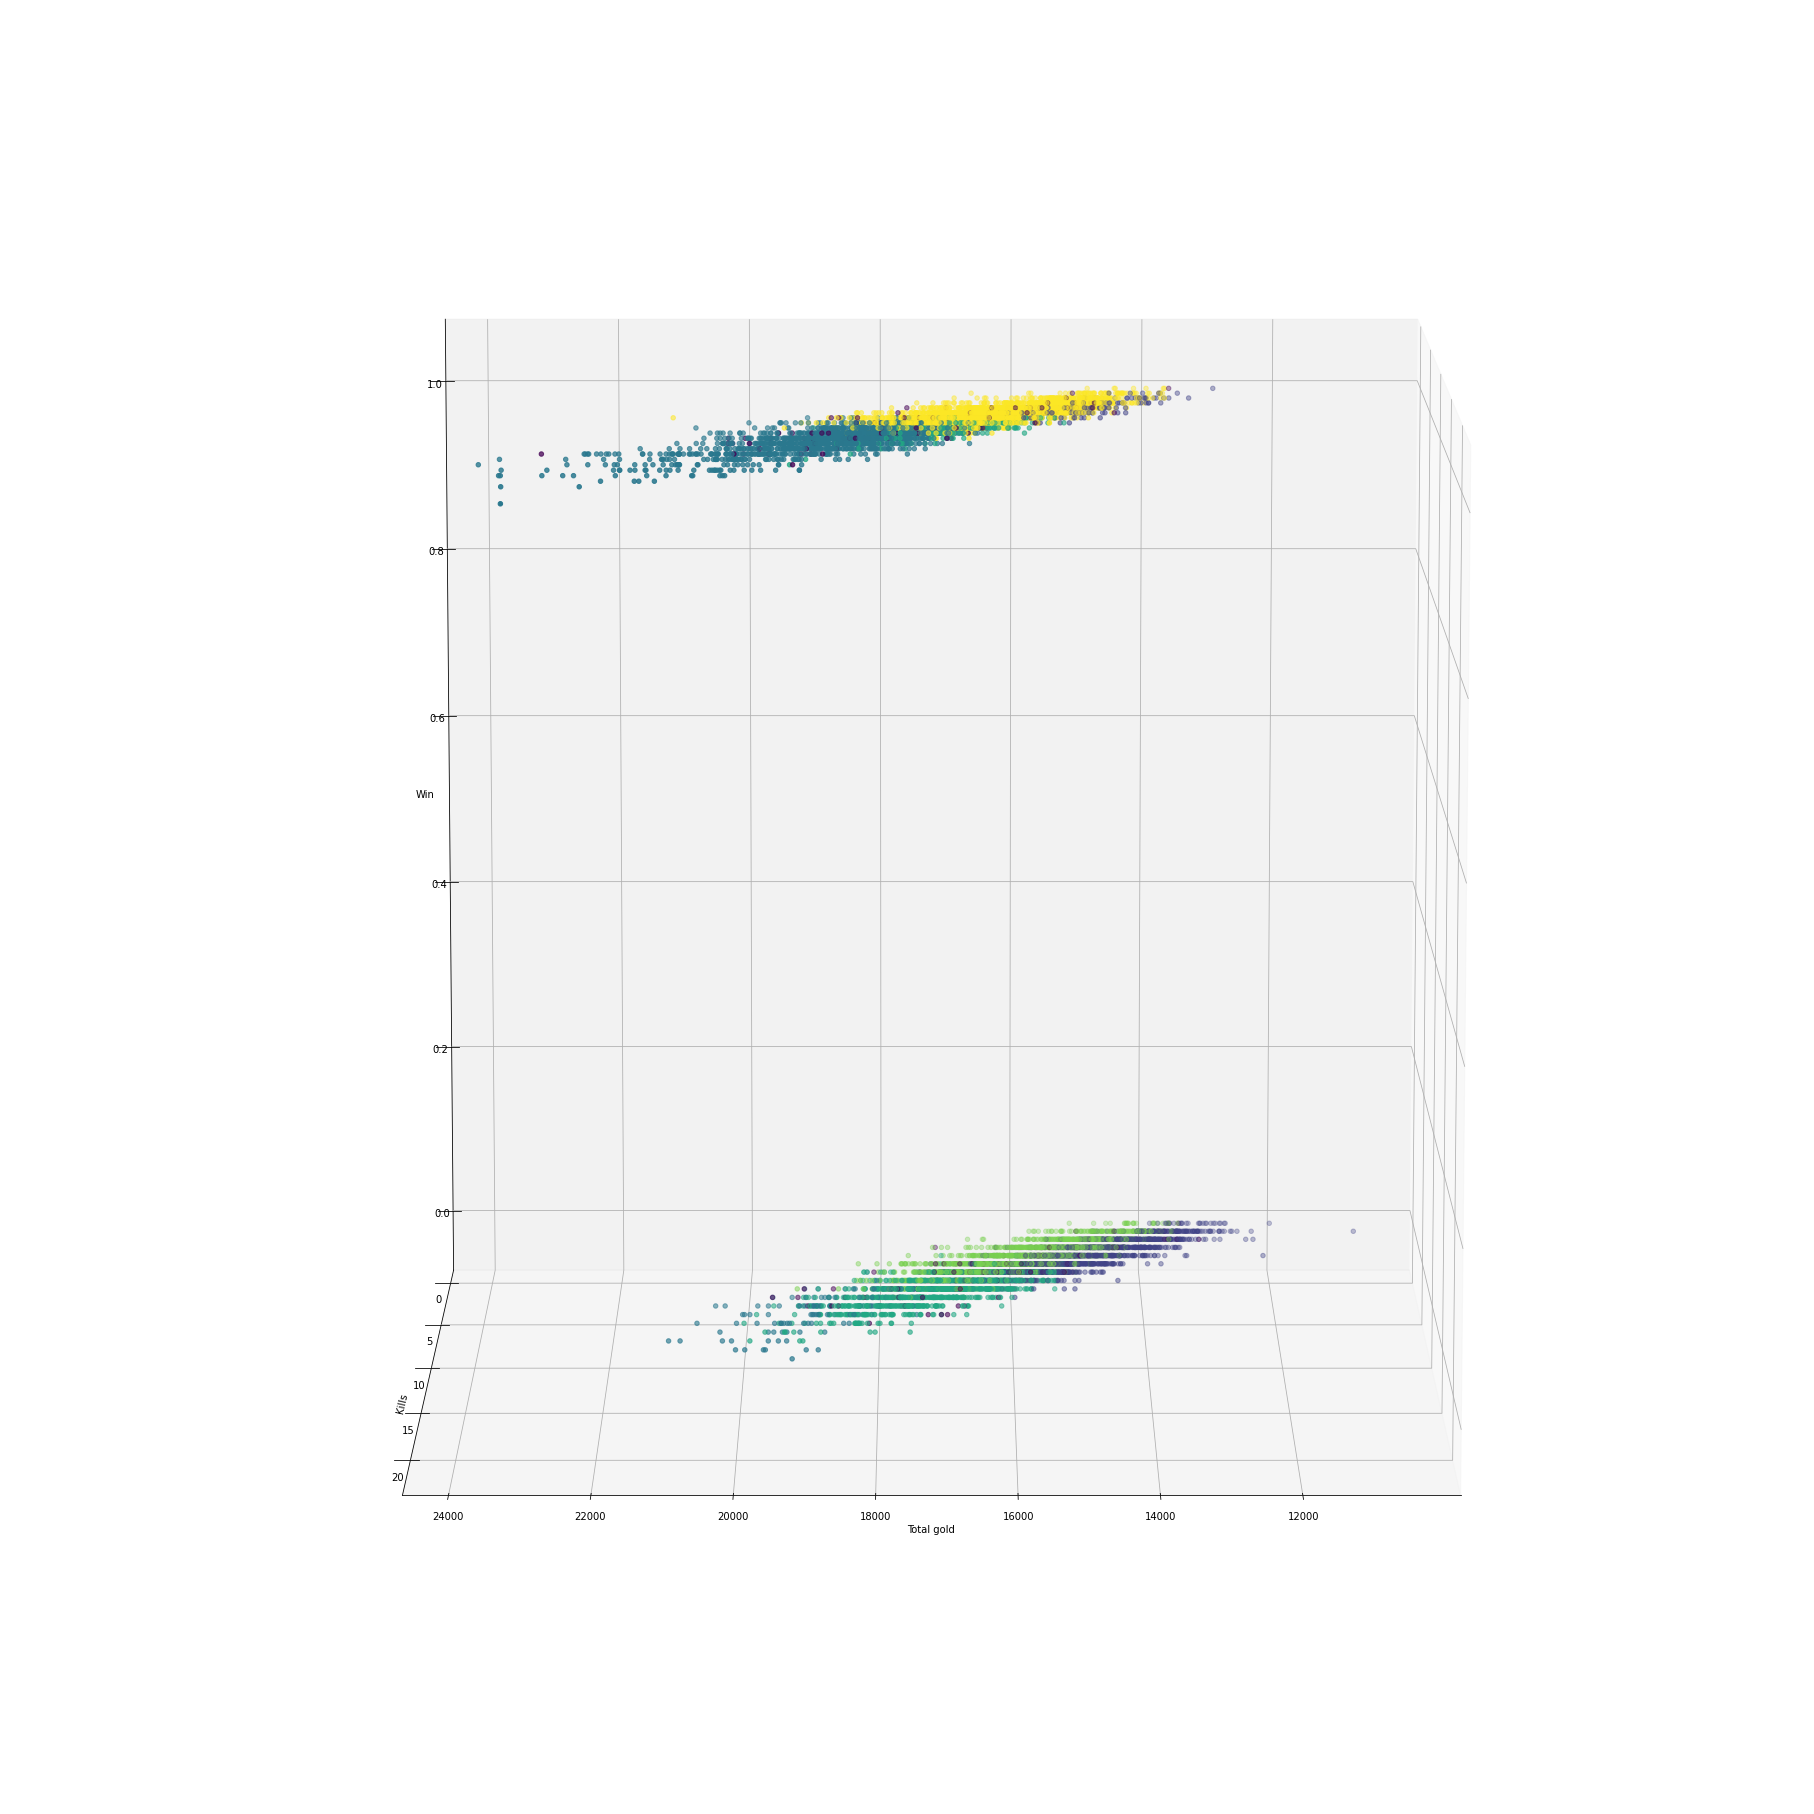

In [123]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,25))
ax = Axes3D(fig)
ax.scatter(rankeds['blueTotalGold'], rankeds['blueKills'], rankeds['blueWins'], c=km.labels_)
ax.set_xlabel('Total gold')
ax.set_ylabel('Kills')
ax.set_zlabel('Win')
ax.view_init(10, 90)
plt.show()

### Grupowanie metodą K-means (n=3)

In [ ]:
for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rankeds)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(metrics.silhouette_score(rankeds, kmeans.labels_, metric='euclidean'))
    calinski_harabaz_scores.append(metrics.calinski_harabaz_score(rankeds, kmeans.labels_))

In [ ]:
plt.scatter(x=np.arange(2,12), y=inertia_scores)

In [ ]:
plt.scatter(x=np.arange(2,12), y=silhouette_scores)

In [ ]:
plt.scatter(x=np.arange(2,12), y=calinski_harabaz_scores)

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(rankeds)

In [ ]:
clusterCenters = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_))
clusterCenters.columns = rankeds.columns

clusterCenters

In [ ]:
rankeds_new = scaler.inverse_transform(rankeds)
rankeds_classified = pd.DataFrame(rankeds_new)
rankeds_classified.columns = rankeds.columns
rankeds_classified['class'] = kmeans.labels_
rankeds_classified.head(10)

In [ ]:
rankeds_classified.groupby(rankeds_classified['class']).size()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)
ax.scatter(
rankeds['blueKills'],
rankeds['blueDeaths'],
rankeds['blueAssists'],
c=kmeans.labels_
)
plt.title('Wykres punktowy gatunków win')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
linkage_matrix =linkage(rankeds, 'single')
plt.figure(figsize=(14,6))
dendrogram(linkage_matrix, color_threshold=0)
plt.show()

In [ ]:
linkage_matrix = linkage(rankeds, 'average')
plt.figure(figsize=(14,6))
dendrogram(linkage_matrix, color_threshold=0)
plt.show()

In [ ]:
class_number = fcluster(linkage_matrix, t=5, criterion='maxclust')

class_number

In [ ]:
centers_new = rankeds.groupby(class_number).mean()
centers_new_df = pd.DataFrame(scaler.inverse_transform(centers_new))
centers_new_df.columns = rankeds.columns
centers_new_df